In [5]:
from sea_breeze import load_model_data
from dask.distributed import Client
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [2]:
client = Client()
client

2025-01-14 15:21:54,601 - distributed.preloading - INFO - Creating preload: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
2025-01-14 15:21:54,604 - distributed.utils - INFO - Reload module schedplugin from .py file
2025-01-14 15:21:54,609 - distributed.preloading - INFO - Import preload module: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 32789 instead
  warnings.warn(


Modifying workers


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-bdw-0040.gadi.nci.org.au/28444/proxy/32789/status,
Dashboard: /node/gadi-cpu-bdw-0040.gadi.nci.org.au/28444/proxy/32789/status,Workers: 7
Total threads: 7,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39617,Workers: 7
Dashboard: /node/gadi-cpu-bdw-0040.gadi.nci.org.au/28444/proxy/32789/status,Total threads: 7
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:44571,Total threads: 1
Dashboard: /node/gadi-cpu-bdw-0040.gadi.nci.org.au/28444/proxy/39805/status,Memory: 0 B
Nanny: tcp://127.0.0.1:40133,


In [3]:
lat_slice = slice(-12.5,-10.5)
lon_slice = slice(129.5,132)

INFO: Take the weighted mean and convert complex numbers to an angle and magnitude...
INFO: Calculating the sum of the weights...
INFO: Calculating variance...
INFO: Calculating minimum distance to the coast...


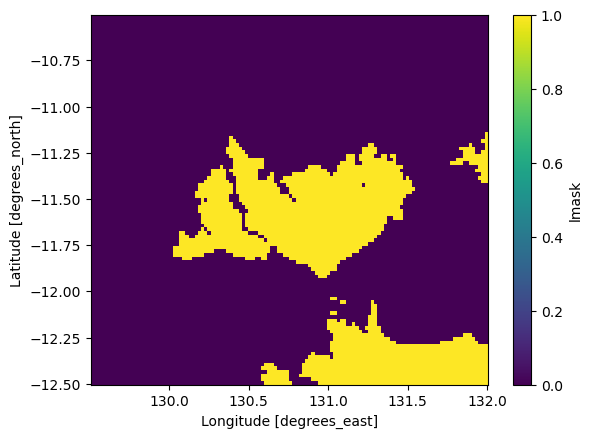

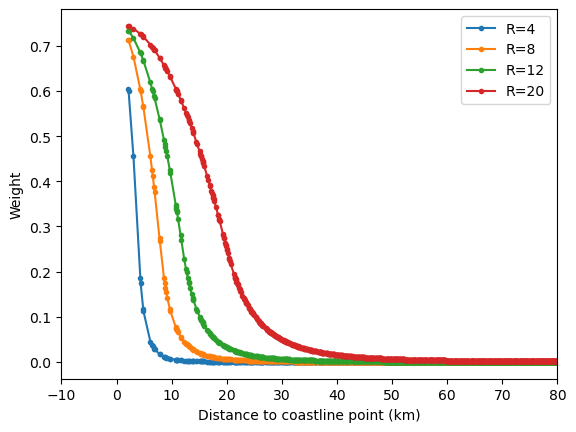

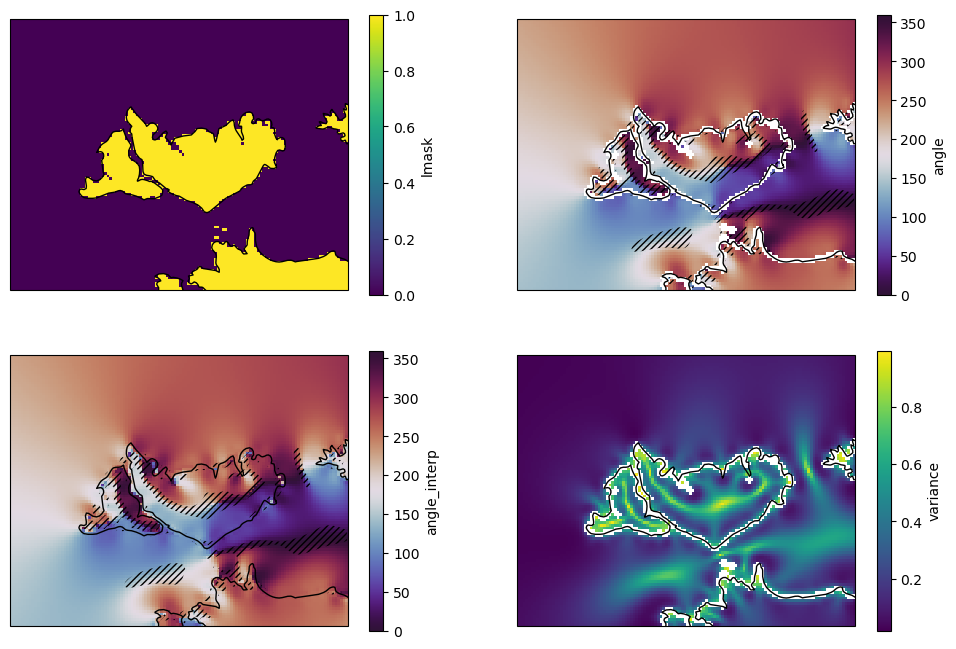

In [61]:
#Load land sea mask and compute coastline angles
orog, lsm = load_model_data.load_aus2200_static(
    "mjo-elnino",
    lon_slice,
    lat_slice)
lsm.plot()

plt.figure()
def get_dist_list(lsm):
    xx = lsm.lon.values.flatten()
    yy = lsm.lat.values.flatten()
    import pyproj
    geod = pyproj.Geod(ellps="WGS84")
    x = []
    for i in np.arange(xx.shape[0]):
        for j in np.arange(yy.shape[0]):
            _,_,d = geod.inv(xx[0],yy[0],xx[i],yy[j])
            x.append(d)
    x = np.array(x)/1000
    return x

p = 4
q = 2
slope = -1
r = 10000

x = np.sort(get_dist_list(lsm))


R = 4
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

R = 8
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

R = 12
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

R = 20
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

# R = 50
# plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

# R = 80
# plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)


plt.ylabel("Weight")
plt.xlabel("Distance to coastline point (km)")
plt.legend()
plt.xlim([-10,80])


angle_ds = load_model_data.get_coastline_angle_kernel(
    lsm,
    R=8,
    compute=True)

plt.figure(figsize=[12,8])
ax = plt.subplot(2,2,1,projection=ccrs.PlateCarree())
lsm.plot()
ax.coastlines()
ax = plt.subplot(2,2,2,projection=ccrs.PlateCarree())
angle_ds.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,3,projection=ccrs.PlateCarree())
angle_ds.angle_interp.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,4,projection=ccrs.PlateCarree())
angle_ds.variance.plot()
ax.coastlines()

INFO: Take the weighted mean and convert complex numbers to an angle and magnitude...
INFO: Calculating the sum of the weights...
INFO: Calculating variance...
INFO: Calculating minimum distance to the coast...


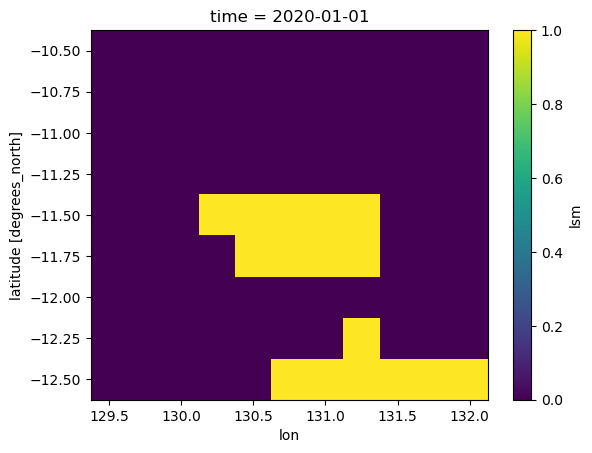

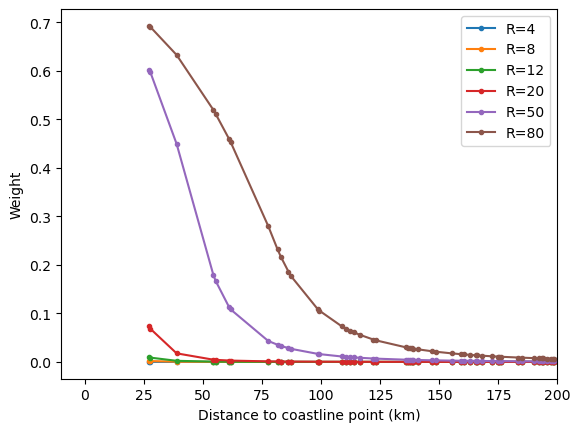

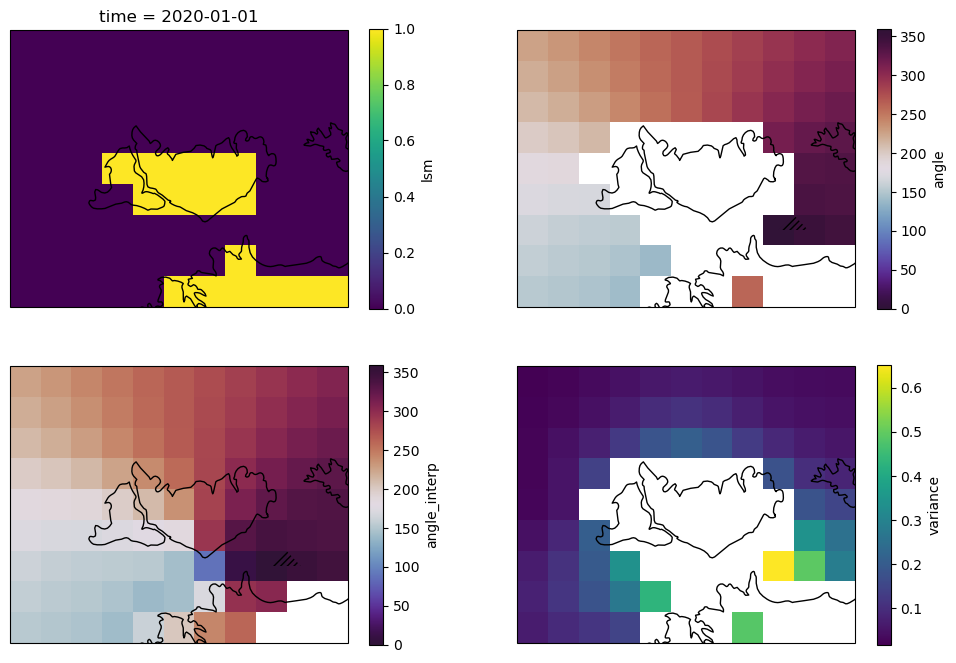

In [59]:
#Load land sea mask and compute coastline angles
orog, lsm, _ = load_model_data.load_era5_static(
    lon_slice,
    lat_slice,
    "2020-01-01 00:00",
    "2020-01-01 00:00")
lsm.plot()

plt.figure()
def get_dist_list(lsm):
    xx = lsm.lon.values.flatten()
    yy = lsm.lat.values.flatten()
    import pyproj
    geod = pyproj.Geod(ellps="WGS84")
    x = []
    for i in np.arange(xx.shape[0]):
        for j in np.arange(yy.shape[0]):
            _,_,d = geod.inv(xx[0],yy[0],xx[i],yy[j])
            x.append(d)
    x = np.array(x)/1000
    return x

p = 4
q = 2
slope = -1
r = 10000

x = np.sort(get_dist_list(lsm))


R = 4
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

R = 8
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

R = 12
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

R = 20
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

R = 50
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)

R = 80
plt.plot(x, load_model_data.get_weights(x,p,q,R,slope,r), marker="o", label="R="+str(R), ms=3)


plt.ylabel("Weight")
plt.xlabel("Distance to coastline point (km)")
plt.legend()
plt.xlim([-10,200])


angle_ds = load_model_data.get_coastline_angle_kernel(
    lsm,
    R=80,
    compute=True)

plt.figure(figsize=[12,8])
ax = plt.subplot(2,2,1,projection=ccrs.PlateCarree())
lsm.plot()
ax.coastlines()
ax = plt.subplot(2,2,2,projection=ccrs.PlateCarree())
angle_ds.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,3,projection=ccrs.PlateCarree())
angle_ds.angle_interp.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,4,projection=ccrs.PlateCarree())
angle_ds.variance.plot()
ax.coastlines()